In [348]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from collections import namedtuple

from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [87]:
df = pd.read_csv("./data/dados_voz_genero.csv")

# IA048 – Aprendizado de Máquina
## Exercícios de Fixação de Conceitos (EFC) 2 – 2s2020
###  Classificação binária

Você dispõe de um conjunto de dados contendo 3168 amostras rotuladas. Cada amostra é descrita por 19 atributos acústicos extraídos de trechos gravados de voz, considerando a faixa de frequências de 0 a 280 Hz. A última coluna corresponde ao rótulo associado a cada padrão, sendo igual a ‘1’ para o gênero masculino, e ‘0’ para o gênero feminino.

  a. Faça uma análise das características dos atributos de entrada considerando os respectivos histogramas e as medidas de correlação entre eles.
  
  b. Construa, então, o modelo de regressão logística para realizar a classificação dos padrões. Para isso, reserve uma parte dos dados (e.g., 20%) para validação, usando todas as demais amostras para o treinamento do modelo. Pensem na pertinência e na possibilidade de realizar algum pré-processamento nos dados (e.g., normalização).

  Apresente e discuta os seguintes resultados com relação ao conjunto de validação:

    - A curva ROC;
    - A curva de evolução da 𝐹 -medida em função do threshold de decisão

  c. Indique qual seria o valor mais adequado para o threshold de decisão e por quê. Empregando, então, esse threshold, obtenha a matriz de confusão e a acurácia do classificador para o conjunto de validação. Comente os resultados obtidos.

In [349]:
def t_test(a, b):
    N = len(a)
    #For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
    var_a = a.var(ddof=1)
    var_b = b.var(ddof=1)

    #std deviation
    s = np.sqrt((var_a + var_b)/2)

    ## Calculate the t-statistics
    t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

    ## Compare with the critical t-value
    #Degrees of freedom
    df = 2*N - 2

    #p-value after comparison with the t 
    p = 1 - stats.t.cdf(t,df=df)
    return p

def histogram_intersection(a, b):
    return t_test(a, b)

def plot_histogram(df, column='dfrange'):    
    mapping = { 0: 'Female', 1: 'Male' }
    figure = plt.figure(figsize=(24, 24))
    seaborn.histplot(df.replace({ 'label': mapping }), x=column, alpha=0.5, hue='label')
    return abs(1 - t_test(df[df['label'] == 1][column], df[df['label'] == 0][column]))

def plot_matrix(df):
    correlation = df.corr().abs()
    np.fill_diagonal(correlation.values, 0)

    figure = plt.figure(figsize=(24, 24))
    plt.matshow(correlation, fignum=figure.number)

    xticks = plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    yticks = plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    colorbar = plt.colorbar()

    serie = correlation.unstack().sort_values(ascending=False, kind="quicksort")
    highest_correlations = serie.drop_duplicates().where(serie > 0.8).dropna()

    return highest_correlations


Score(none=0.5, logistic_regression=0.9835209612161285)


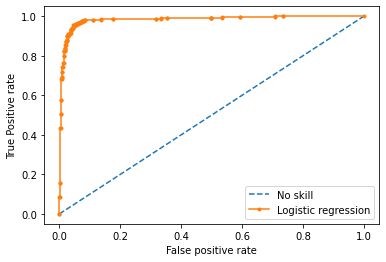

Score(none=0.5, logistic_regression=0.9835209612161285)

In [343]:
def logistic_regression(df, test_size=0.2):
    model = LogisticRegression()
    X = df[['meanfun']]
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)

    return model.score(X_test, y_test)

def roc_score(df):
    X = df[['meanfun']]
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
    ns_probs = [0 for _ in range(len(y_test))]
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    Score = namedtuple('Score', ['none', 'logistic_regression'])

    return Score(ns_auc, lr_auc)

def roc_plot(df):
    X = df[['meanfun']]
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
    
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    ns_probs = [0 for _ in range(len(y_test))]
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')    
    plt.legend()
    plt.show()

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    Score = namedtuple('Score', ['none', 'logistic_regression'])

    return Score(ns_auc, lr_auc)

print(roc_score(df))
roc_plot(df)


maxdom    dfrange     0.999838
kurt      skew        0.977020
centroid  median      0.925445
Q25       centroid    0.911416
sd        IQR         0.874660
IQR       Q25         0.874189
sfm       sp.ent      0.866411
sd        Q25         0.846931
sfm       sd          0.838086
label     meanfun     0.833921
meandom   maxdom      0.812838
          dfrange     0.811304
dtype: float64

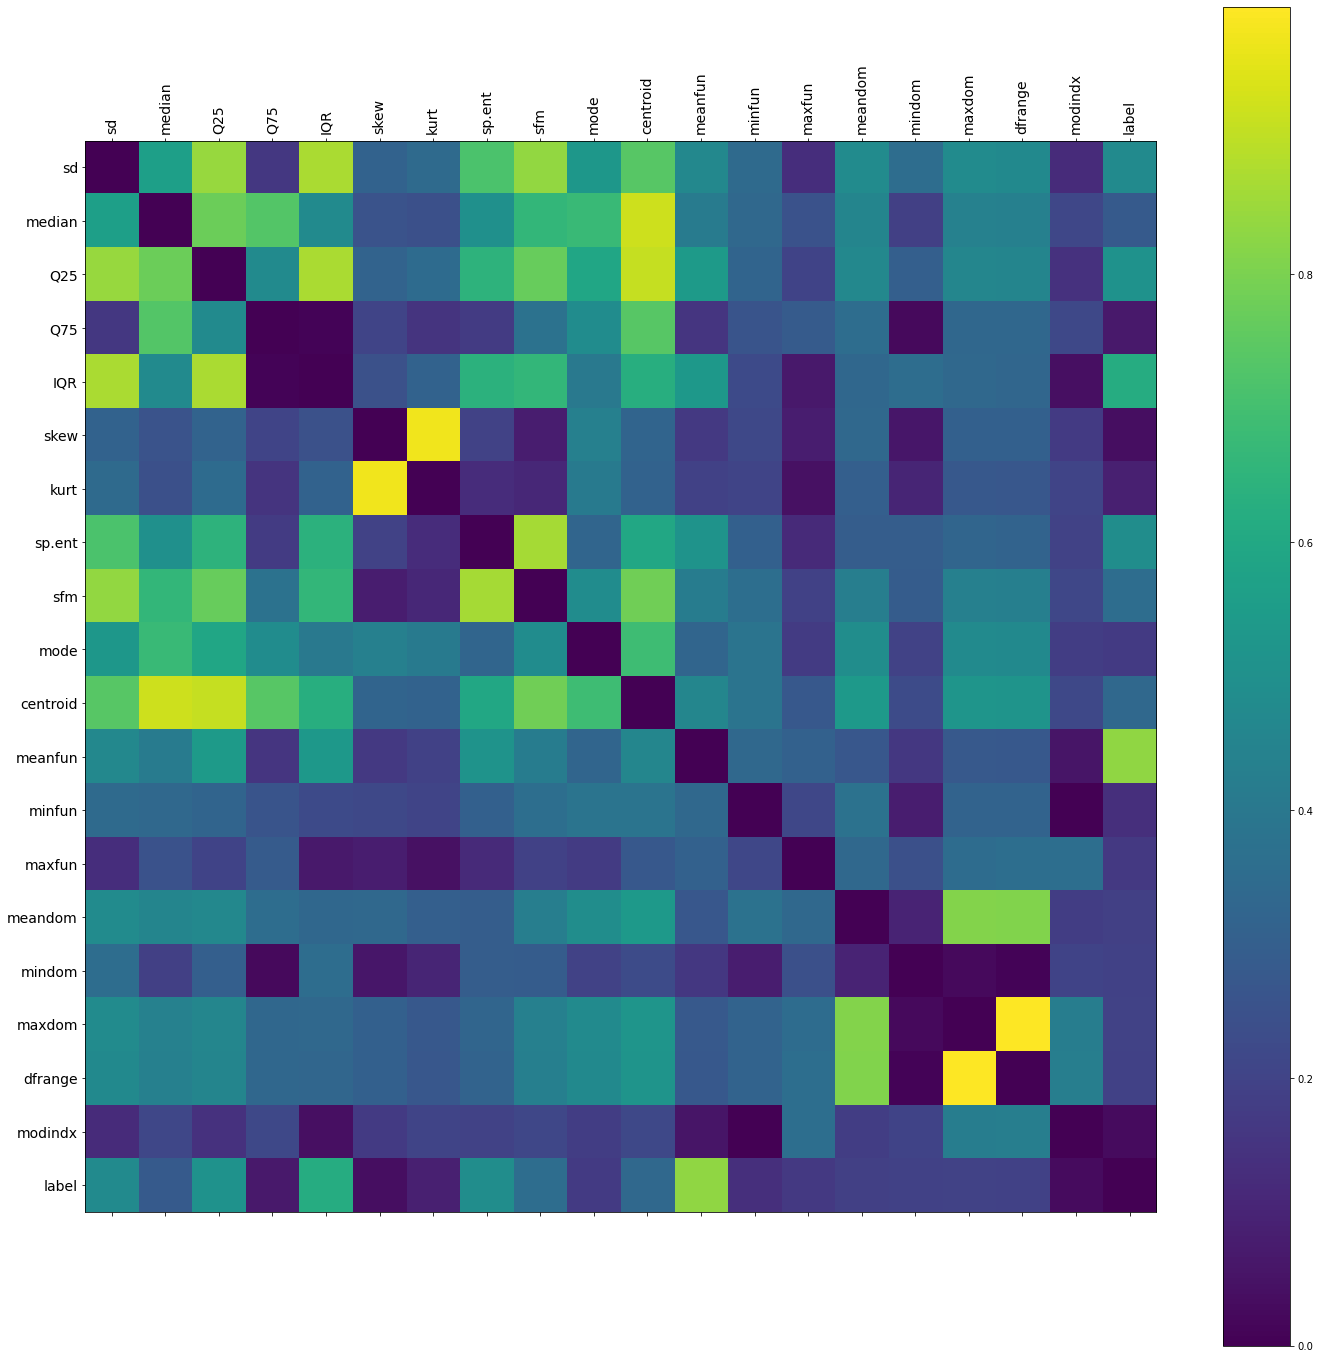

In [251]:
plot_matrix(df)

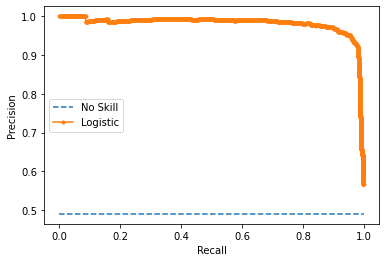

Logistic(f1=0.9431396786155747, auc=0.9811288957722084)


In [347]:
def precision(df):
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
    model = LogisticRegression(solver='lbfgs')
    model.fit(trainX, trainy)

    lr_probs = model.predict_proba(testX)
    lr_probs = lr_probs[:, 1]
    yhat = model.predict(testX)
    lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
    lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

    no_skill = len(testy[testy==1]) / len(testy)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    Logistic = namedtuple('Logistic', ['f1', 'auc'])
    return Logistic(lr_f1, lr_auc)

print(precision(df))

1.0


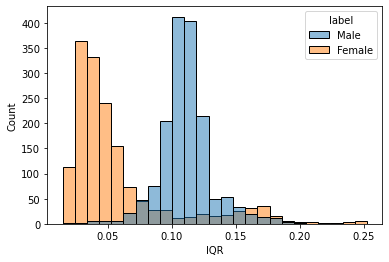

In [252]:
print(plot_histogram(df, column='IQR'))

<AxesSubplot:xlabel='Q25', ylabel='Count'>

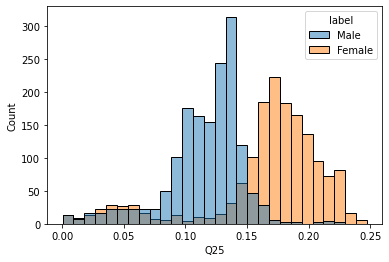

In [239]:
plot_histogram(df, column='Q25')

0.0

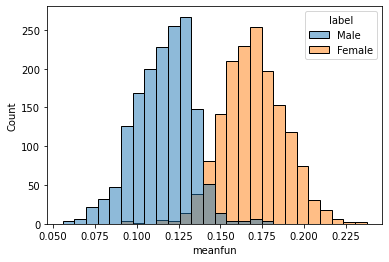

In [256]:
plot_histogram(df, column='meanfun')

1.0

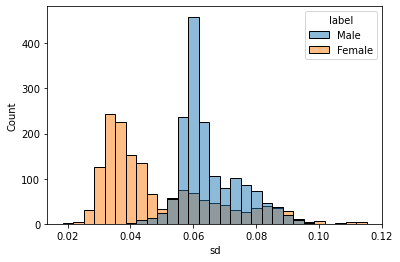

In [257]:
plot_histogram(df, column='sd')

plot_histogram(df, column='sp.ent')

###  Classificação multi-classe

Problema: identificação de atividade humana usando dados de smartphones

Base de dados: [har_smartphone.zip](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

Nesta atividade, o conjunto de dados contém atributos nos domínios do tempo e da frequência extraídos de sinais de acelerômetro e giroscópio de um smartphone. Os rótulos das amostras indicam qual a atividade realizada por um voluntário humano durante a aquisição dos sinais:

| Label | Activity         |
|-------|------------------|
| 0     | Caminhada        |
| 1     | Subindo escadas  |
| 2     | Descendo escadas |
| 3     | Sentado          |
| 4     | Em pé            |
| 5     | Deitado          |

O conjunto de dados já está separado em uma parte para treinamento e outra para teste. Ao todo, temos 7352 amostras de treinamento e 2947 amostras de teste; cada amostra é descrita por 561 atributos temporais ou espectrais.
Dois métodos de classificação serão explorados nesta aplicação: regressão logística e 𝑘-nearest neighbors.

  a. Construa uma solução para este problema baseada no modelo de regressão logística. Descreva a abordagem escolhida para resolvê-lo (softmax, classificadores binários combinados em um esquema um-contra-um ou um- contra-todos). Obtenha, então, a matriz de confusão para o classificador considerando os dados do conjunto de teste.
Além disso, adote uma métrica global para a avaliação do desempenho (médio) deste classificador. Como sugestão, consulte a referência [M. SOKOLOVA & G. LAPALME, “A Systematic Analysis of Performance Measures for Classification Tasks”. Information Processing & Management, vol. 45, no. 4, pp. 427-437, 2009](https://www.researchgate.net/publication/222674734_A_systematic_analysis_of_performance_measures_for_classification_tasks). Discuta os resultados obtidos.

  b. Considere, agora, a técnica 𝑘-nearest neighbors (𝑘NN). Varie o parâmetro 𝑘 e
analise as matrizes de confusão obtidas junto aos dados de teste e o desempenho médio (computado com a mesma métrica adotada no item (a)). Comente os resultados obtidos, inclusive estabelecendo uma comparação com o desempenho da regressão logística.

In [471]:
def roc_score(X_train, X_test, y_train, y_test):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
    ns_probs = [0 for _ in range(len(y_test))]
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    Score = namedtuple('Score', ['none', 'logistic_regression'])

    return Score(ns_auc, lr_auc)

def logistic_regression(df, test_size=0.2):
    model = LogisticRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)

    return model.score(X_test, y_test)

def trans():
    f = open('./data/har_smartphone/X_train.csv')
    for d in f.readlines():
        print(d)
    f.close()

def logistic_regression():
    X_train = pd.read_csv('./data/har_smartphone/X_train.csv', sep=' ', names=list('012345'))
    print(X_train.head())
    print(len(X_train))
print(logistic_regression())

In [460]:
foo()

FileNotFoundError: [Errno 2] No such file or directory: './data/har_smartphone/X_train.txt'